In [1]:
!pip install ultralytics

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.0/1.0 MB 16.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 363.4/363.4 MB 4.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 13.8/13.8 MB 77.2 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 24.6/24.6 MB 77.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 883.7/883.7 kB 36.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 664.8/664.8 MB 1.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 211.5/211.5 MB 8.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 56.3/56.3 MB 30.7 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 127.9/127.9 MB 13.3 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 207.5/207.5 MB 8.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.1/21.1 MB 84.3 MB/s eta 0:00:00
  Attempting uninstall: nvidia-nvjitlink-cu12
    Found existing installation: nvidia-nvjitlink-cu12 12.5.82
    Uninstalling

In [2]:
from ultralytics import YOLO

# Load a model
model = YOLO("yolo11n.yaml")  # build a new model from YAML

Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
import os
import shutil
from pathlib import Path

source_root = Path("/kaggle/input/urban-issues-dataset")

class_map = {
    "Potholes": 1,
    "Garbage": 0 
}

# Output YOLO dataset structure
output_root = Path("/kaggle/working/dataset")
splits = ["train", "valid", "test"]

# Create output folders
for split in splits:
    (output_root / "images" / split).mkdir(parents=True, exist_ok=True)
    (output_root / "labels" / split).mkdir(parents=True, exist_ok=True)

# Merge images & labels
for class_name, class_id in class_map.items():
    for split in splits:
        img_dir = source_root / class_name / class_name / split / "images"
        label_dir = source_root / class_name / class_name / split / "labels"
        
        for img_file in img_dir.glob("*.*"):
            # Copy image
            dest_img_path = output_root / "images" / split / f"{class_name}_{img_file.name}"
            shutil.copy(img_file, dest_img_path)
            
            # Read & update label file
            src_label_path = label_dir / f"{img_file.stem}.txt"
            dest_label_path = output_root / "labels" / split / f"{class_name}_{img_file.stem}.txt"
            
            if src_label_path.exists():
                with open(src_label_path, "r") as f:
                    lines = f.readlines()
                new_lines = []
                for line in lines:
                    parts = line.strip().split()
                    parts[0] = str(class_id)  # update class ID
                    new_lines.append(" ".join(parts) + "\n")
                with open(dest_label_path, "w") as f:
                    f.writelines(new_lines)

print("YOLO dataset ready at:", output_root)

YOLO dataset ready at: /kaggle/working/dataset


In [4]:
# Use the model
results = model.train(data="/kaggle/input/urban-issues-dataset/config.yaml", epochs=100, imgsz=640, device=[-1, -1])  # train the model

Searching for 2 idle GPUs with free memory >= 20.0% and free utilization >= 0.0%...
Selected idle CUDA devices [0, 1]
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/kaggle/input/urban-issues-dataset/config.yaml, degrees=0.0, deterministic=True, device=0,1, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=False, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, mod

Overriding model.yaml nc=80 with nc=2

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      6640  ultralytics.nn.modules.block.C3k2            [32, 64, 1, False, 0.25]      
  3                  -1  1     36992  ultralytics.nn.modules.conv.Conv             [64, 64, 3, 2]                
  4                  -1  1     26080  ultralytics.nn.modules.block.C3k2            [64, 128, 1, False, 0.25]     
  5                  -1  1    147712  ultralytics.nn.modules.conv.Conv             [128, 128, 3, 2]              
  6                  -1  1     87040  ultralytics.nn.modules.block.C3k2            [128, 128, 1, True]           
  7                  -1  1    295424  ultralytics

AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 2017.3±741.7 MB/s, size: 183.1 KB)


train: Scanning /kaggle/working/dataset/labels/train... 5892 images, 70 backgrounds, 0 corrupt: 100%|██████████| 5892/5892 [00:04<00:00, 1336.35it/s]


train: New cache created: /kaggle/working/dataset/labels/train.cache
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 398.8±167.2 MB/s, size: 77.4 KB)


val: Scanning /kaggle/working/dataset/labels/valid... 795 images, 0 backgrounds, 0 corrupt: 100%|██████████| 795/795 [00:00<00:00, 1594.24it/s]


val: New cache created: /kaggle/working/dataset/labels/valid.cache
Plotting labels to runs/detect/train/labels.jpg... 
optimizer: 'optimizer=auto' found, ignoring 'lr0=0.01' and 'momentum=0.937' and determining best 'optimizer', 'lr0' and 'momentum' automatically... 
optimizer: AdamW(lr=0.001667, momentum=0.9) with parameter groups 81 weight(decay=0.0), 88 weight(decay=0.0005), 87 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 4 dataloader workers
Logging results to runs/detect/train
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      1.42G      3.278      3.832      3.777         11        640: 100%|██████████| 369/369 [01:14<00:00,  4.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:07<00:00,  6.48it/s]


                   all        795       2166     0.0289     0.0401    0.00772    0.00355

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      1.58G      2.651       3.39      2.941         10        640: 100%|██████████| 369/369 [01:10<00:00,  5.23it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.29it/s]


                   all        795       2166      0.554     0.0881     0.0269    0.00701

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      1.58G      2.459      3.081      2.656          3        640: 100%|██████████| 369/369 [01:08<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.65it/s]


                   all        795       2166      0.116      0.194     0.0317    0.00942

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100      1.61G      2.365      2.899      2.513         35        640: 100%|██████████| 369/369 [01:08<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.85it/s]


                   all        795       2166      0.288      0.228      0.143     0.0444

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      1.63G      2.282      2.749      2.412         17        640: 100%|██████████| 369/369 [01:08<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.82it/s]


                   all        795       2166      0.264      0.274       0.18     0.0652

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      1.64G      2.208      2.623      2.327         17        640: 100%|██████████| 369/369 [01:08<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  8.19it/s]


                   all        795       2166      0.265      0.238      0.156     0.0558

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      1.64G       2.16      2.548      2.266         11        640: 100%|██████████| 369/369 [01:08<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.77it/s]


                   all        795       2166      0.352      0.292      0.233     0.0921

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      1.67G       2.12      2.469      2.221         16        640: 100%|██████████| 369/369 [01:08<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.82it/s]


                   all        795       2166      0.365      0.322      0.267      0.109

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      1.68G      2.107      2.455      2.182         22        640: 100%|██████████| 369/369 [01:08<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.74it/s]


                   all        795       2166      0.306      0.279      0.207     0.0897

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100       1.7G      2.088      2.391      2.164          6        640: 100%|██████████| 369/369 [01:08<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.47it/s]


                   all        795       2166      0.378      0.362      0.296      0.128

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100       1.7G      2.053      2.337      2.124          4        640: 100%|██████████| 369/369 [01:08<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.65it/s]


                   all        795       2166      0.418      0.354      0.311      0.134

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      1.73G      2.034      2.318      2.116          6        640: 100%|██████████| 369/369 [01:08<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.67it/s]


                   all        795       2166      0.395      0.319      0.277      0.117

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      1.74G       2.04      2.299      2.107         15        640: 100%|██████████| 369/369 [01:09<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.67it/s]


                   all        795       2166      0.436       0.32      0.311      0.141

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      1.76G      2.032       2.27      2.101         17        640: 100%|██████████| 369/369 [01:08<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.56it/s]


                   all        795       2166       0.46      0.356      0.351      0.162

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      1.76G      2.001       2.23      2.072          4        640: 100%|██████████| 369/369 [01:08<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.63it/s]


                   all        795       2166       0.44      0.384      0.355      0.161

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      1.79G      1.972      2.218      2.064          6        640: 100%|██████████| 369/369 [01:09<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.79it/s]


                   all        795       2166      0.454      0.354      0.338      0.154

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100       1.8G      1.978      2.192       2.05          7        640: 100%|██████████| 369/369 [01:08<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.51it/s]


                   all        795       2166      0.444      0.371      0.346      0.164

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      1.81G      1.979      2.171      2.039         10        640: 100%|██████████| 369/369 [01:08<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.18it/s]


                   all        795       2166      0.444      0.387      0.391      0.186

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      1.82G      1.969      2.165      2.043          8        640: 100%|██████████| 369/369 [01:08<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.57it/s]


                   all        795       2166      0.454      0.389      0.376      0.173

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      1.85G      1.954       2.11      2.023         19        640: 100%|██████████| 369/369 [01:08<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.72it/s]


                   all        795       2166      0.483      0.407      0.403      0.197

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      1.86G       1.96      2.131      2.028         15        640: 100%|██████████| 369/369 [01:09<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.35it/s]


                   all        795       2166      0.506      0.384       0.39      0.187

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      1.96G      1.941       2.12      2.013          7        640: 100%|██████████| 369/369 [01:09<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.50it/s]


                   all        795       2166      0.427      0.419      0.403        0.2

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      1.96G      1.929      2.074      1.999          4        640: 100%|██████████| 369/369 [01:08<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.55it/s]


                   all        795       2166      0.468      0.418       0.41      0.204

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      1.99G      1.924      2.099      1.999         13        640: 100%|██████████| 369/369 [01:08<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.46it/s]


                   all        795       2166      0.493      0.422      0.427      0.208

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.09G       1.92      2.087      1.996         33        640: 100%|██████████| 369/369 [01:08<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.47it/s]


                   all        795       2166      0.493      0.423      0.438      0.215

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.11G      1.894      2.038      1.962         16        640: 100%|██████████| 369/369 [01:08<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.99it/s]


                   all        795       2166      0.529      0.404      0.432      0.224

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.11G      1.893      2.039      1.972         31        640: 100%|██████████| 369/369 [01:08<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.73it/s]


                   all        795       2166      0.495      0.422      0.429      0.213

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      2.13G      1.897      2.032      1.975          7        640: 100%|██████████| 369/369 [01:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.95it/s]


                   all        795       2166      0.548      0.402      0.444      0.226

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      2.15G      1.889       2.01       1.96         10        640: 100%|██████████| 369/369 [01:08<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.47it/s]


                   all        795       2166      0.508      0.425      0.451      0.231

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      2.16G       1.89      1.983      1.949          4        640: 100%|██████████| 369/369 [01:08<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.16it/s]


                   all        795       2166      0.528      0.401      0.434      0.216

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      2.17G       1.88      1.964      1.947         16        640: 100%|██████████| 369/369 [01:08<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.77it/s]


                   all        795       2166      0.515      0.438      0.453      0.235

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      2.19G      1.863      1.955      1.934          8        640: 100%|██████████| 369/369 [01:08<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.69it/s]


                   all        795       2166      0.548      0.425       0.47      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      2.21G      1.874      1.978      1.938         11        640: 100%|██████████| 369/369 [01:08<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.83it/s]


                   all        795       2166      0.564      0.434      0.478      0.244

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      2.22G      1.881      1.972      1.938         12        640: 100%|██████████| 369/369 [01:08<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.55it/s]


                   all        795       2166      0.549      0.443      0.479      0.246

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      2.23G      1.846      1.921      1.921         13        640: 100%|██████████| 369/369 [01:08<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.58it/s]


                   all        795       2166      0.566      0.445      0.471      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      2.25G      1.841      1.927      1.907         10        640: 100%|██████████| 369/369 [01:08<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.80it/s]


                   all        795       2166      0.544      0.446      0.478      0.249

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      2.27G      1.846      1.913       1.91          6        640: 100%|██████████| 369/369 [01:08<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.74it/s]


                   all        795       2166      0.548      0.442      0.485      0.253

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      2.28G      1.852      1.907      1.909         32        640: 100%|██████████| 369/369 [01:08<00:00,  5.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.75it/s]


                   all        795       2166      0.574      0.443      0.489      0.257

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      2.29G      1.861      1.925      1.911          5        640: 100%|██████████| 369/369 [01:08<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.61it/s]


                   all        795       2166      0.563      0.443      0.492      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      2.31G      1.831      1.905      1.902         20        640: 100%|██████████| 369/369 [01:08<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.27it/s]


                   all        795       2166       0.59      0.428      0.496      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      2.33G      1.838      1.876      1.891         18        640: 100%|██████████| 369/369 [01:08<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.63it/s]


                   all        795       2166      0.535      0.464      0.499      0.259

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      2.34G      1.806      1.866       1.89         10        640: 100%|██████████| 369/369 [01:08<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.86it/s]


                   all        795       2166      0.574      0.451      0.497      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      2.35G      1.819      1.858      1.877          6        640: 100%|██████████| 369/369 [01:08<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.71it/s]


                   all        795       2166       0.57      0.454      0.509      0.262

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      2.37G      1.808      1.838      1.868          5        640: 100%|██████████| 369/369 [01:08<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.19it/s]


                   all        795       2166      0.605      0.451      0.515      0.269

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100      2.38G      1.801      1.867      1.876          5        640: 100%|██████████| 369/369 [01:08<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.40it/s]


                   all        795       2166      0.581      0.449      0.506      0.266

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100       2.4G      1.806      1.847      1.873         14        640: 100%|██████████| 369/369 [01:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.04it/s]


                   all        795       2166      0.567      0.469      0.512       0.27

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100       2.4G       1.81      1.841      1.864          5        640: 100%|██████████| 369/369 [01:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.69it/s]


                   all        795       2166      0.569      0.459      0.504      0.268

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      2.43G      1.811      1.823       1.88         20        640: 100%|██████████| 369/369 [01:08<00:00,  5.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.88it/s]


                   all        795       2166      0.597      0.473      0.527      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      2.44G      1.788      1.809      1.848         24        640: 100%|██████████| 369/369 [01:08<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.22it/s]


                   all        795       2166      0.577      0.476      0.524      0.279

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      2.46G      1.799      1.805      1.865         28        640: 100%|██████████| 369/369 [01:08<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.53it/s]


                   all        795       2166      0.588      0.465      0.525      0.277

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100      2.46G      1.775      1.792      1.842         45        640: 100%|██████████| 369/369 [01:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.76it/s]


                   all        795       2166      0.566      0.489      0.524       0.28

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      2.49G      1.765      1.782      1.844         12        640: 100%|██████████| 369/369 [01:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.48it/s]


                   all        795       2166      0.584      0.466      0.523      0.278

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100       2.5G      1.775      1.757      1.838         35        640: 100%|██████████| 369/369 [01:08<00:00,  5.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.97it/s]


                   all        795       2166      0.618      0.468      0.534      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      2.52G      1.811       1.82      1.862         13        640: 100%|██████████| 369/369 [01:07<00:00,  5.43it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.18it/s]


                   all        795       2166      0.599      0.486      0.539      0.285

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      2.53G      1.778      1.755      1.835         19        640: 100%|██████████| 369/369 [01:08<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.49it/s]


                   all        795       2166      0.624       0.47      0.534      0.281

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      2.55G      1.777      1.771      1.849         19        640: 100%|██████████| 369/369 [01:09<00:00,  5.28it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.50it/s]


                   all        795       2166        0.6      0.482      0.534      0.284

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100      2.56G      1.778      1.768      1.833          6        640: 100%|██████████| 369/369 [01:09<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.76it/s]


                   all        795       2166      0.612      0.472      0.536      0.287

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      2.58G      1.754      1.725      1.821         18        640: 100%|██████████| 369/369 [01:10<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.07it/s]


                   all        795       2166       0.61      0.482      0.541      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      2.58G      1.769      1.749      1.826         11        640: 100%|██████████| 369/369 [01:10<00:00,  5.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.51it/s]


                   all        795       2166      0.597      0.478       0.54      0.289

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      2.61G      1.767      1.739      1.828         19        640: 100%|██████████| 369/369 [01:08<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.16it/s]


                   all        795       2166      0.618      0.479      0.545       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      2.62G      1.767      1.738      1.817         14        640: 100%|██████████| 369/369 [01:09<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.50it/s]


                   all        795       2166      0.639      0.483      0.547       0.29

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100      2.64G      1.773      1.726      1.821          8        640: 100%|██████████| 369/369 [01:10<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.18it/s]


                   all        795       2166      0.593        0.5       0.55      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100      2.65G      1.749      1.705      1.811         15        640: 100%|██████████| 369/369 [01:09<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.53it/s]


                   all        795       2166      0.617      0.487      0.548      0.292

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      2.67G      1.762      1.704      1.818         32        640: 100%|██████████| 369/369 [01:10<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.66it/s]


                   all        795       2166      0.636       0.48      0.553      0.294

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      2.69G      1.746      1.692      1.808         19        640: 100%|██████████| 369/369 [01:10<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.01it/s]


                   all        795       2166      0.625      0.491      0.557      0.296

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100       2.7G      1.716      1.686      1.804          8        640: 100%|██████████| 369/369 [01:09<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.66it/s]


                   all        795       2166      0.641       0.48      0.562        0.3

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100       2.7G      1.758      1.681      1.807         19        640: 100%|██████████| 369/369 [01:09<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.59it/s]


                   all        795       2166      0.639      0.481      0.561      0.299


  0%|          | 0/369 [00:00<?, ?it/s]


      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100      2.72G      1.748      1.689      1.805          4        640: 100%|██████████| 369/369 [01:10<00:00,  5.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.19it/s]


                   all        795       2166       0.62      0.493      0.558      0.297

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      2.74G      1.746      1.662      1.801          8        640: 100%|██████████| 369/369 [01:09<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.68it/s]


                   all        795       2166      0.623      0.497      0.563      0.299

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      2.75G      1.698      1.654      1.772         18        640: 100%|██████████| 369/369 [01:09<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.95it/s]


                   all        795       2166      0.644      0.485       0.57      0.303

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      2.76G      1.749       1.67      1.796         25        640: 100%|██████████| 369/369 [01:09<00:00,  5.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.35it/s]


                   all        795       2166      0.632        0.5      0.567      0.304

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      2.78G       1.74      1.671      1.801         18        640: 100%|██████████| 369/369 [01:08<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.13it/s]


                   all        795       2166      0.664      0.489      0.567      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100       2.8G      1.737      1.661      1.796          5        640: 100%|██████████| 369/369 [01:09<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.92it/s]


                   all        795       2166      0.645      0.506      0.571      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100      2.81G      1.718      1.645      1.789          7        640: 100%|██████████| 369/369 [01:09<00:00,  5.34it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.62it/s]


                   all        795       2166       0.65      0.502      0.572      0.305

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      2.82G      1.715      1.626      1.773         25        640: 100%|██████████| 369/369 [01:08<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.56it/s]


                   all        795       2166      0.642      0.505      0.572      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      2.84G      1.723      1.659      1.795          9        640: 100%|██████████| 369/369 [01:08<00:00,  5.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.24it/s]


                   all        795       2166      0.643      0.501      0.571      0.306

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      2.86G       1.71      1.648      1.786         11        640: 100%|██████████| 369/369 [01:08<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.53it/s]


                   all        795       2166      0.654      0.493      0.572      0.307

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      2.88G      1.746      1.645      1.788         17        640: 100%|██████████| 369/369 [01:08<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.60it/s]


                   all        795       2166      0.652        0.5      0.579      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      2.88G      1.718      1.632      1.772         12        640: 100%|██████████| 369/369 [01:08<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.79it/s]


                   all        795       2166      0.636      0.506      0.575      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       2.9G        1.7      1.633      1.768          4        640: 100%|██████████| 369/369 [01:08<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.48it/s]


                   all        795       2166      0.637      0.506      0.573      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      2.92G      1.712       1.62      1.775         34        640: 100%|██████████| 369/369 [01:08<00:00,  5.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.06it/s]


                   all        795       2166      0.646      0.508      0.578      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      2.93G      1.692      1.613      1.776         11        640: 100%|██████████| 369/369 [01:08<00:00,  5.37it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.73it/s]


                   all        795       2166      0.661      0.511       0.58      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      2.94G      1.702      1.613       1.77          9        640: 100%|██████████| 369/369 [01:08<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.28it/s]


                   all        795       2166      0.659      0.504      0.577       0.31

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      2.96G      1.719      1.616      1.784          4        640: 100%|██████████| 369/369 [01:09<00:00,  5.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.38it/s]


                   all        795       2166      0.648       0.51      0.576      0.308

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      2.98G      1.699      1.607       1.76         12        640: 100%|██████████| 369/369 [01:08<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.09it/s]


                   all        795       2166      0.646      0.511      0.577      0.309

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100      2.99G      1.684      1.592      1.754         20        640: 100%|██████████| 369/369 [01:08<00:00,  5.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.24it/s]


                   all        795       2166      0.642      0.511      0.577      0.311

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100         3G      1.672      1.559      1.744          3        640: 100%|██████████| 369/369 [01:09<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.14it/s]


                   all        795       2166      0.646       0.51      0.576      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      3.02G      1.691      1.579      1.754         17        640: 100%|██████████| 369/369 [01:09<00:00,  5.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.73it/s]


                   all        795       2166      0.654       0.51       0.58      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      3.04G      1.676      1.585      1.756          5        640: 100%|██████████| 369/369 [01:09<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.04it/s]


                   all        795       2166      0.646       0.51      0.581      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      3.05G        1.7      1.587      1.762          9        640: 100%|██████████| 369/369 [01:09<00:00,  5.31it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.33it/s]


                   all        795       2166      0.651       0.51      0.583      0.313
Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      3.05G      1.724      1.554      1.833          2        640: 100%|██████████| 369/369 [01:08<00:00,  5.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.13it/s]


                   all        795       2166      0.652       0.51      0.579      0.312

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      3.08G      1.713      1.535      1.827          2        640: 100%|██████████| 369/369 [01:07<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.71it/s]


                   all        795       2166       0.64      0.513      0.578      0.313

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      3.09G      1.723      1.519      1.817          6        640: 100%|██████████| 369/369 [01:07<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.51it/s]


                   all        795       2166      0.647       0.52      0.584      0.314

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      3.11G      1.715      1.518      1.816          6        640: 100%|██████████| 369/369 [01:07<00:00,  5.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.47it/s]


                   all        795       2166      0.653      0.514      0.585      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      3.12G      1.696      1.486      1.818          5        640: 100%|██████████| 369/369 [01:06<00:00,  5.51it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.82it/s]


                   all        795       2166      0.647      0.522      0.586      0.315

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      3.14G      1.687      1.485      1.807         18        640: 100%|██████████| 369/369 [01:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.38it/s]


                   all        795       2166      0.659      0.511      0.584      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      3.16G      1.701      1.511      1.817         12        640: 100%|██████████| 369/369 [01:07<00:00,  5.48it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.29it/s]


                   all        795       2166      0.642      0.513      0.583      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      3.17G      1.699      1.487      1.801          2        640: 100%|██████████| 369/369 [01:07<00:00,  5.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.87it/s]


                   all        795       2166       0.65      0.517      0.584      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      3.17G      1.689      1.494      1.799          4        640: 100%|██████████| 369/369 [01:07<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  9.17it/s]


                   all        795       2166      0.644      0.516      0.585      0.316

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100       3.2G      1.682      1.468      1.794          7        640: 100%|██████████| 369/369 [01:07<00:00,  5.44it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:05<00:00,  8.98it/s]


                   all        795       2166      0.648      0.516      0.586      0.318

100 epochs completed in 2.077 hours.
Optimizer stripped from runs/detect/train/weights/last.pt, 5.5MB
Optimizer stripped from runs/detect/train/weights/best.pt, 5.5MB

Validating runs/detect/train/weights/best.pt...
Ultralytics 8.3.176 🚀 Python-3.11.13 torch-2.6.0+cu124 CUDA:0 (Tesla T4, 15095MiB)
                                                        CUDA:1 (Tesla T4, 15095MiB)
YOLO11n summary (fused): 100 layers, 2,582,542 parameters, 0 gradients, 6.3 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 50/50 [00:06<00:00,  7.45it/s]
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1
/usr/local/lib/python3.11/dist-packages/matplotlib/colors.py:721: RuntimeWarning: invalid value encountered in less
  xa[xa < 0] = -1


                   all        795       2166      0.647      0.516      0.586      0.318
               Garbage        660       1175       0.63      0.598      0.648      0.413
              Potholes        135        991      0.663      0.433      0.524      0.223
Speed: 0.2ms preprocess, 2.1ms inference, 0.0ms loss, 1.7ms postprocess per image
Results saved to runs/detect/train



image 1/1 /kaggle/input/urban-issues-dataset/test1.jpg: 224x640 2 Garbages, 56.0ms
Speed: 1.6ms preprocess, 56.0ms inference, 172.5ms postprocess per image at shape (1, 3, 224, 640)


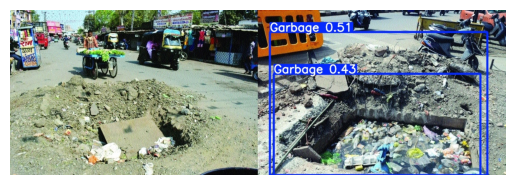

In [5]:
from ultralytics import YOLO
import cv2

# Load model
model = YOLO('/kaggle/working/runs/detect/train/weights/last.pt')

# Run inference
results = model('/kaggle/input/urban-issues-dataset/test1.jpg')

# Save results with bounding boxes to a folder
results[0].save(filename='/kaggle/working/output.jpg')

# Display the saved image (only works in Kaggle Notebook output)
img = cv2.imread('/kaggle/working/output.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

import matplotlib.pyplot as plt
plt.imshow(img)
plt.axis('off')
plt.show()


image 1/1 /kaggle/input/urban-issues-dataset/test2.png: 384x640 1 Garbage, 46.2ms
Speed: 1.8ms preprocess, 46.2ms inference, 2.0ms postprocess per image at shape (1, 3, 384, 640)


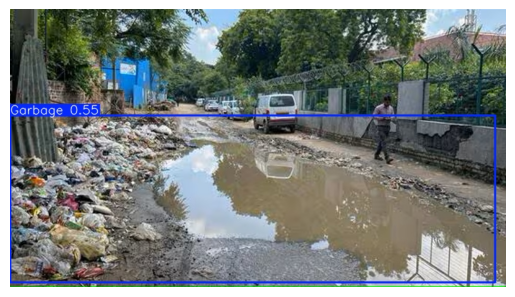

In [6]:
# Run inference
results = model('/kaggle/input/urban-issues-dataset/test2.png')

# Save results with bounding boxes to a folder
results[0].save(filename='/kaggle/working/output.jpg')

# Display the saved image (only works in Kaggle Notebook output)
img = cv2.imread('/kaggle/working/output.jpg')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

plt.imshow(img)
plt.axis('off')
plt.show()